In [30]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import math
from mpl_toolkits import mplot3d
import scipy, scipy.optimize
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red

## Load Data

In [80]:
# Load Data(Edge)
file_location = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\Outputs\Design Space\data_log(Edge)2.xlsx'
assert os.path.isfile(file_location)
df = pd.read_excel(file_location,sheet_name='data_log(Edge)')
print("Headers:")
print(list(df.columns))
data_log(Edge)_incr

Headers:
['Unnamed: 0', 'Shelf Temperature(C)', 'Chamber Pressure(mTorr)', 'Drying Time(Hrs)', 'Product Temperature(C)']


In [85]:
# Load Data(Edge)
file_location1 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\Outputs\Design Space\data_log(Edge)_incr.xlsx'
assert os.path.isfile(file_location1)
df1 = pd.read_excel(file_location1,sheet_name='data_log(Edge)_incr')
print("Headers:")
print(list(df1.columns))

Headers:
['Unnamed: 0', 'Shelf Temperature(C)', 'Chamber Pressure(mTorr)', 'Drying Time(Hrs)', 'Product Temperature(C)']


In [88]:
# Load Data(Core)
file_location2 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\Outputs\Design Space\data_log(Core)_incr.xlsx'
assert os.path.isfile(file_location2)
df2 = pd.read_excel(file_location2,sheet_name='data_log(Core)_incr')
print("Headers:")
print(list(df2.columns))

Headers:
['Unnamed: 0', 'Shelf Temperature(C)', 'Chamber Pressure(mTorr)', 'Drying Time(Hrs)', 'Product Temperature(C)']


In [81]:
#Define Variables(df)-Edge
temp=(df[['Shelf Temperature(C)']]).values #Shelf Temp.
press=(df[['Chamber Pressure(mTorr)']]).values #Chamber Press.
dt= (df[['Drying Time(Hrs)']]).values#Predicted Drying Time
tp= (df[['Product Temperature(C)']]).values#Predicted Product Temp.

In [86]:
#Define Variables(df1)-Edge
temp1=(df1[['Shelf Temperature(C)']]).values #Shelf Temp.
press1=(df1[['Chamber Pressure(mTorr)']]).values #Chamber Press.
dt1= (df1[['Drying Time(Hrs)']]).values#Predicted Drying Time
tp1= (df1[['Product Temperature(C)']]).values#Predicted Product Temp.

In [89]:
#Define Variables(df2)-Core
temp2=(df2[['Shelf Temperature(C)']]).values #Shelf Temp.
press2=(df2[['Chamber Pressure(mTorr)']]).values #Chamber Press.
dt2= (df2[['Drying Time(Hrs)']]).values#Predicted Drying Time
tp2= (df2[['Product Temperature(C)']]).values#Predicted Product Temp.

## Scatter Plots

[[-30 -30 -30 ...   0   0   0]
 [-30 -30 -30 ...   0   0   0]
 [-30 -30 -30 ...   0   0   0]
 ...
 [-30 -30 -30 ...   0   0   0]
 [-30 -30 -30 ...   0   0   0]
 [-30 -30 -30 ...   0   0   0]]
[[ 50  50  50 ...  50  50  50]
 [ 75  75  75 ...  75  75  75]
 [100 100 100 ... 100 100 100]
 ...
 [175 175 175 ... 175 175 175]
 [200 200 200 ... 200 200 200]
 [225 225 225 ... 225 225 225]]
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)


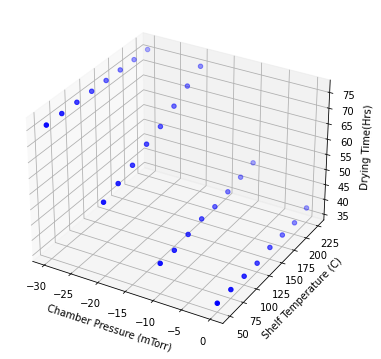

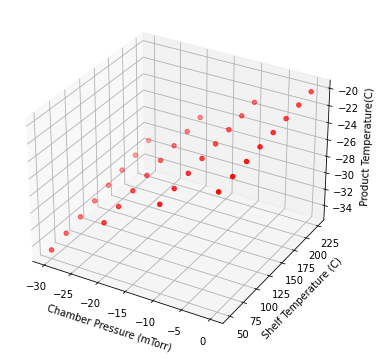

In [82]:
#Create meshgrid
xx,yy=np.meshgrid(temp,press)
print(xx)
print(yy)

#Plot
data=[dt,tp]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","r"]
for i in range(2):
    plt.figure(figsize=(5, 5))
    ax = plt.axes(projection='3d')

    # Data for three-dimensional scattered points
    zdata = data[i]
    xdata = temp
    ydata = press
    print(xdata.shape)
    print(ydata.shape)
    print(zdata.shape)
    ax.scatter3D(xdata, ydata, zdata, color=c[i])
    ax.set_xlabel('Chamber Pressure (mTorr)')
    ax.set_ylabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
# save the plot as a file
#plt.savefig('DesignSpace-Edge.jpg',format='jpeg')

In [39]:
# setup test data
raw_data = [2.0, 2.0, 2.0], [1.5, 1.5, 1.5], [0.5, 0.5, 0.5],[3.0, 2.0, 1.0], [3.0, 2.0, 1.0],\
       [3.0, 2.0, 1.0], [2.4, 2.5, 2.2], [2.4, 3.0, 2.5], [4.0, 3.3, 8.0]

# convert data into proper format
x_data = []
y_data = []
z_data = []
for item in raw_data:
    x_data.append(item[0])
    y_data.append(item[1])
    z_data.append(item[2])
print(x_data)

[2.0, 1.5, 0.5, 3.0, 3.0, 3.0, 2.4, 2.4, 4.0]


In [37]:
#Data
print(temp.shape)
x_data=temp.reshape(-1).tolist()
y_data=press.reshape(-1).tolist()
z_data=dt.reshape(-1).tolist()

(39, 1)
[-35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


## Surface Fitting

### Edge Cases

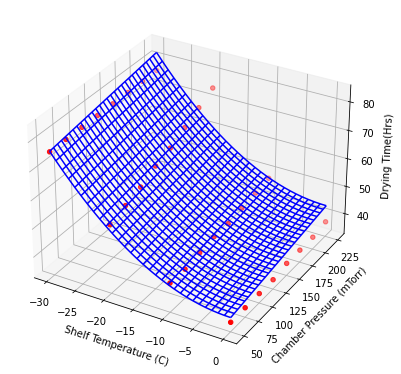

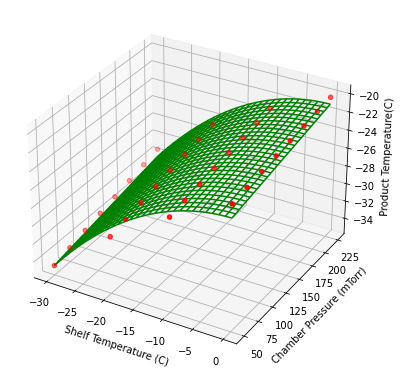

In [83]:
#Plot(Edge)
data=[dt,tp]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","g"]
for i in range(2):    
    # test function
    def function(data,a, b, c):
        x = data[0]
        y = data[1]
        return (y*b) + (x*x*c)+a
        #return b*x+c*y+a #Linear Plane
    #Data
    x_data=temp.reshape(-1).tolist()
    y_data=press.reshape(-1).tolist()
    z_data=data[i].reshape(-1).tolist()

    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data, maxfev=100000)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(x_data), max(x_data), 30)
    model_y_data = np.linspace(min(y_data), max(y_data), 30)
    # create coordinate arrays for vectorized evaluations
    X, Y = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z = function(np.array([X, Y]), *parameters)

    # setup figure object
    fig = plt.figure(figsize=(5,8))
    # setup 3d object
    ax = Axes3D(fig)
    # plot surface
    #ax.plot_surface(X, Y, Z,cmap="Greens")
    ax.plot_wireframe(X, Y, Z,color=c[i])

    # plot input data
    ax.scatter(x_data, y_data, z_data, color="red")
    # set plot descriptions
    ax.set_ylabel('Chamber Pressure (mTorr)')
    ax.set_xlabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
    plt.show()

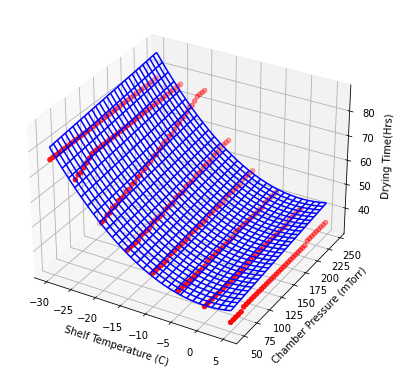

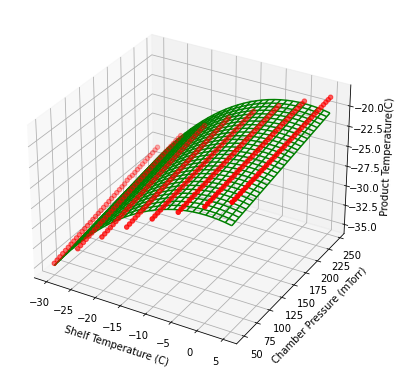

In [87]:
#Plot (Edge more data points)
data=[dt1,tp1]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","g"]
for i in range(2):    
    # test function
    def function(data,a, b, c):
        x = data[0]
        y = data[1]
        return (y*b) + (x*x*c)+a
        #return b*x+c*y+a #Linear Plane
    #Data
    x_data=temp1.reshape(-1).tolist()
    y_data=press1.reshape(-1).tolist()
    z_data=data[i].reshape(-1).tolist()

    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data, maxfev=100000)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(x_data), max(x_data), 30)
    model_y_data = np.linspace(min(y_data), max(y_data), 30)
    # create coordinate arrays for vectorized evaluations
    X, Y = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z = function(np.array([X, Y]), *parameters)

    # setup figure object
    fig = plt.figure(figsize=(5,8))
    # setup 3d object
    ax = Axes3D(fig)
    # plot surface
    #ax.plot_surface(X, Y, Z,cmap="Greens")
    ax.plot_wireframe(X, Y, Z,color=c[i])

    # plot input data
    ax.scatter(x_data, y_data, z_data, color="red")
    # set plot descriptions
    ax.set_ylabel('Chamber Pressure (mTorr)')
    ax.set_xlabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
    plt.show()

### Core Case

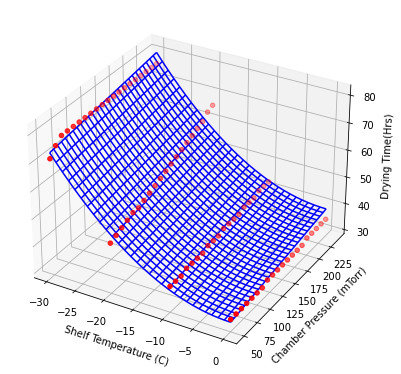

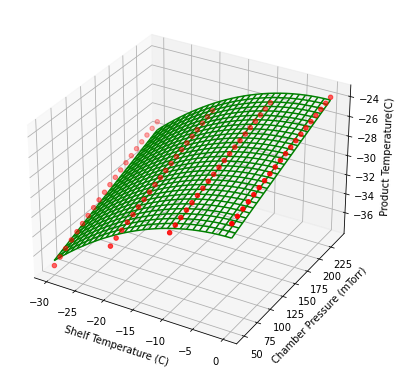

In [94]:
#Plot (Core)
data=[dt2,tp2]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","g"]
for i in range(2):    
    # test function
    def function(data,a, b, c):
        x = data[0]
        y = data[1]
        return (y*b) + (x*x*c)+a
        #return b*x+c*y+a #Linear Plane
    #Data
    x_data=temp2.reshape(-1).tolist()
    y_data=press2.reshape(-1).tolist()
    z_data=data[i].reshape(-1).tolist()

    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data, maxfev=100000)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(x_data), max(x_data), 30)
    model_y_data = np.linspace(min(y_data), max(y_data), 30)
    # create coordinate arrays for vectorized evaluations
    X, Y = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z = function(np.array([X, Y]), *parameters)

    # setup figure object
    fig = plt.figure(figsize=(5,8))
    # setup 3d object
    ax = Axes3D(fig)
    # plot surface
    #ax.plot_surface(X, Y, Z,cmap="Greens")
    ax.plot_wireframe(X, Y, Z,color=c[i])

    # plot input data
    ax.scatter(x_data, y_data, z_data, color="red")
    # set plot descriptions
    ax.set_ylabel('Chamber Pressure (mTorr)')
    ax.set_xlabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
    plt.show()